In [1]:
import random
import numpy as np
import math

# parameters

In [141]:
max_x=900
max_y=900
n_cities=16
population_size=850
mutation_rate=0.8
epoch=3300

# cities

In [5]:
def city_generator(n_cities,max_x,max_y):
    city_list=[]
    for i in range(0,n_cities):
        city=[random.randint(0,max_x),random.randint(0,max_y)]
        if city not in city_list:
            city_list.append(city)
    return city_list


# initial population

In [7]:
def initial_population(population_size,n_cities):
    paths=[]
    city_order=[i for i in range(0,n_cities)]
    for i in range(0,population_size):
        temp=list(city_order)
        random.shuffle(temp)
        temp.append(0)
        paths.append(temp)
    return paths

# crossover and mutation

In [9]:
def crossover(paths, n_cities,mutation_rate):
    new_paths = [p[:] for p in paths]
    for i in range(int(n_cities*mutation_rate)):
        new_paths=mutation(new_paths, n_cities)
    return paths+new_paths

In [10]:
def mutation(paths, n_cities):
    mutated_population = []
    for path in paths:
        new_path = path[:]  # کپی سطحی
        idx1 = random.randint(0, n_cities - 1)
        idx2 = random.randint(0, n_cities - 1)
        new_path[idx1], new_path[idx2] = new_path[idx2], new_path[idx1]
        mutated_population.append(new_path)
    return mutated_population

# fitness function

In [119]:
def calculate_distance(city1, city2):
    return math.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

In [13]:
def fitness(paths, cities):
    for path in paths:
        total_distance = 0
        for i in range(len(path) - 2):  
            city_a = cities[path[i]]
            city_b = cities[path[i + 1]]
            total_distance += calculate_distance(city_a, city_b)
        path[-1] = round(total_distance, 2) 

        start_city = cities[int(path[0])]
        end_city = cities[int(path[-2])]
        total_distance += calculate_distance(end_city, start_city)
        path[-1] = round(total_distance, 2)

    paths_np = np.array(paths, dtype=int)
    sorted_paths = paths_np[np.argsort(paths_np[:, -1])]
    sorted_paths=sorted_paths.tolist()
    
    sorted_paths=sorted_paths[:int(len(sorted_paths)//2)]
    
    return sorted_paths

In [135]:
cities=city_generator(n_cities,max_x,max_y)
paths=initial_population(population_size,n_cities)

In [147]:
for i in range(epoch):
    paths=crossover(paths, n_cities,mutation_rate)
    paths=fitness(paths, cities)
    if i%100 ==0:
        print("epoch:",i,"distance:",paths[0][-1])
print("distance:",paths[0][-1],"------path:",paths[0][:-1])

epoch: 0 distance: 2941
epoch: 100 distance: 2941
epoch: 200 distance: 2941
epoch: 300 distance: 2941
epoch: 400 distance: 2941
epoch: 500 distance: 2941
epoch: 600 distance: 2941
epoch: 700 distance: 2941
epoch: 800 distance: 2941
epoch: 900 distance: 2941
epoch: 1000 distance: 2941
epoch: 1100 distance: 2941
epoch: 1200 distance: 2941
epoch: 1300 distance: 2941
epoch: 1400 distance: 2941
epoch: 1500 distance: 2914
epoch: 1600 distance: 2914
epoch: 1700 distance: 2914
epoch: 1800 distance: 2914
epoch: 1900 distance: 2914
epoch: 2000 distance: 2914
epoch: 2100 distance: 2914
epoch: 2200 distance: 2914
epoch: 2300 distance: 2914
epoch: 2400 distance: 2914
epoch: 2500 distance: 2914
epoch: 2600 distance: 2914
epoch: 2700 distance: 2914
epoch: 2800 distance: 2914
epoch: 2900 distance: 2914
epoch: 3000 distance: 2914
epoch: 3100 distance: 2914
epoch: 3200 distance: 2914
distance: 2914 ------path: [1, 5, 11, 13, 6, 8, 14, 12, 10, 7, 0, 4, 2, 3, 15, 9]


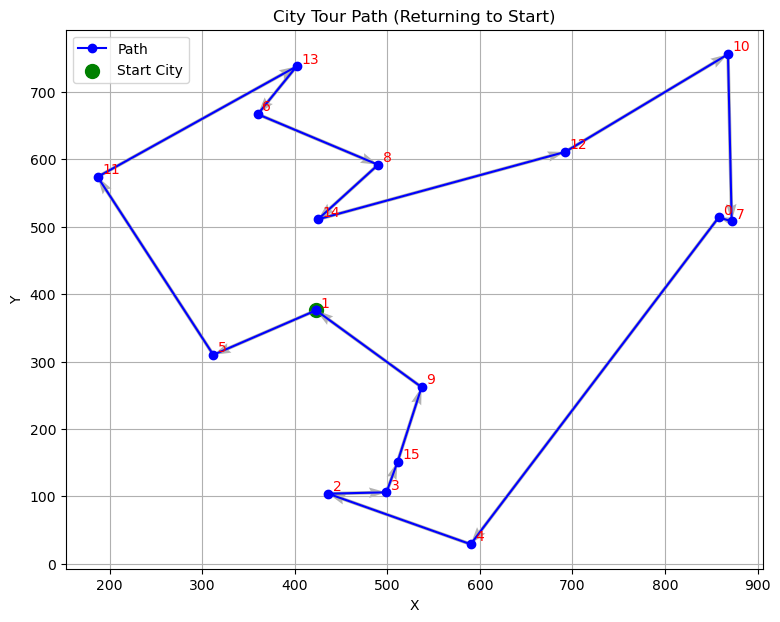

In [148]:
import matplotlib.pyplot as plt

def plot_path(cities, path):
    path = path[:-1]
    full_path = path + [path[0]]#برگرده به جای اول

         # استخراج مختصات شهرها بر اساس ترتیب در مسی
    x_coords = [cities[i][0] for i in full_path]
    y_coords = [cities[i][1] for i in full_path]

    plt.figure(figsize=(9, 7))# تنظیم اندازه نمودار

    plt.plot(x_coords, y_coords, 'b-o', label='Path')

    # نمایش شماره شهرها
    for city_index in path:
        x, y = cities[city_index]
        plt.text(x + 5, y + 5, str(city_index), fontsize=10, color='red')

    # نمایش شهر شروع با رنگ سبز
    start_x, start_y = cities[path[0]]
    plt.scatter(start_x, start_y, color='green', s=100, label='Start City')

    # استفاده از quiver برای رسم فلش‌ها
    for i in range(len(full_path) - 1):
        x1, y1 = cities[full_path[i]]   
        x2, y2 = cities[full_path[i + 1]]
        dx = x2 - x1
        dy = y2 - y1
        plt.quiver(x1, y1, dx, dy,
                   angles='xy', scale_units='xy', scale=1,
                   width=0.005, color='gray', alpha=0.6)

    plt.title("City Tour Path (Returning to Start)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.show()


best_path=paths[0]
plot_path(cities, best_path)